#### Author: Chenxi Wang

In [229]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import os
os.getcwd()

'/Users/sheilacwang/Documents/Study /17Fall/CS 273A/hw/hw1'

# Problem 1: Python & Data Exploration

In [217]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)

In [371]:
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns

## Question 1 

In [221]:
print X.shape

(148, 4)


There are 148 data points and each one has 4 features.

## Question 2

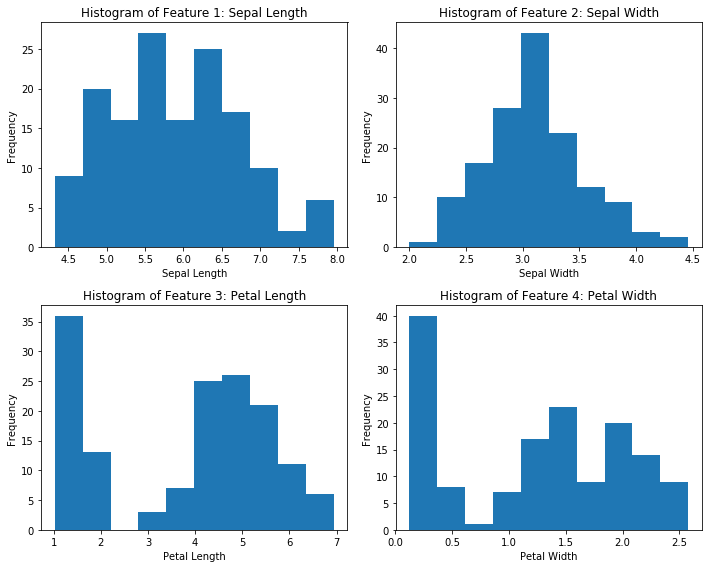

In [349]:
fig, ax = plt.subplots(2,2, figsize=(10, 8))
ax = ax.ravel()
xaxes = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

for j,ax in enumerate(ax):
    ax.hist(X[:,j])
    ax.set_title('Histogram of Feature %s: %s'%(j+1, xaxes[j]))
    ax.set_xlabel(xaxes[j])
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## Question 3

In [23]:
np.set_printoptions(precision=4)

In [306]:
print 'The mean of the data points for each feature:'
print np.mean(X, axis=0)

The mean of the data points for each feature:
[ 5.9001  3.0989  3.8196  1.2526]


In [307]:
print 'The standard deviation of the data points for each feature:'
print np.std(X, axis=0)

The standard deviation of the data points for each feature:
[ 0.8334  0.4363  1.7541  0.7588]


## Question 4

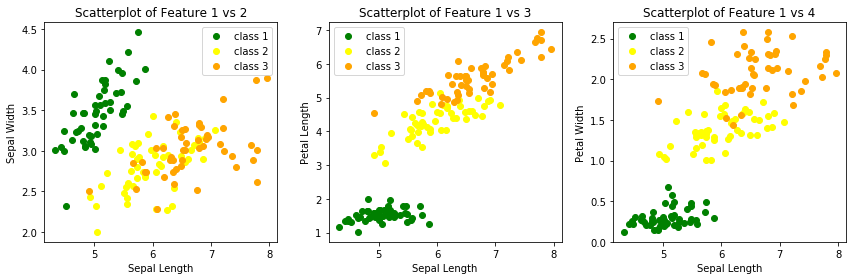

In [381]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax = ax.ravel()
xaxes = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
crs = ['green', 'yellow', 'orange']

for j,ax in enumerate(ax):
    
    for c in np.unique(Y):
        ax.plot(X[Y==c, 0], X[Y==c, j+1], 'o', color = crs[int(c)], \
                label='class %d' % (int(c)+1))
    
    ax.set_title('Scatterplot of Feature 1 vs %s' %(j+2))
    ax.set_xlabel(xaxes[0])
    ax.set_ylabel(xaxes[j+1])
    ax.legend()
plt.tight_layout()
plt.show()

# Problem 2: KNN Predictions

In [389]:
import mltools as ml

Y = iris[:,-1] # target value is the last column
X = iris[:,0:2] # features are the first 2 columns

In [390]:
np.random.seed(0)

X,Y = ml.shuffleData(X,Y);  # shuffle data randomly
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); 
# split data into 75/25 train/validation

## Question 1

The visualization plots of the training data classification are given below:

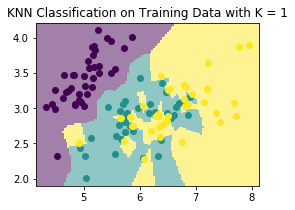

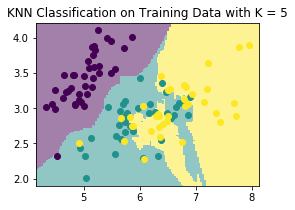

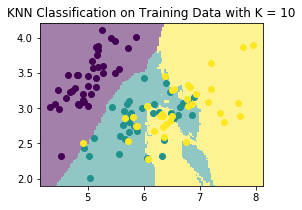

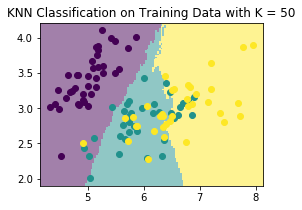

In [409]:
K = [1,5,10,50];

for i, k in enumerate(K):
    knn = ml.knn.knnClassify()    
    knn.train(Xtr, Ytr, k)
    YvaHat = knn.predict(Xva)    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ml.plotClassify2D( knn, Xtr, Ytr )
    ax.set_title(
        'KNN Classification on Training Data with K = %s' %k
    )

    plt.show()


Next I'll visualize the classification boundries using the validation data:

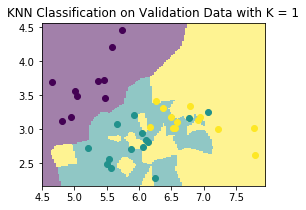

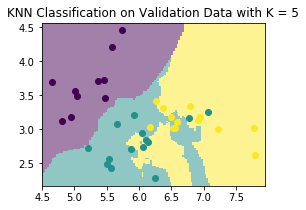

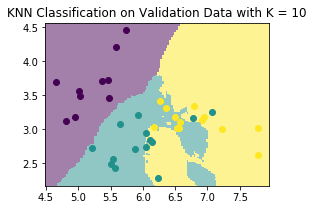

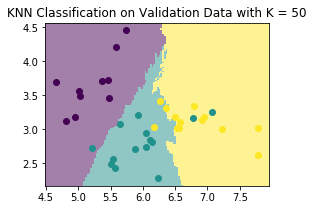

In [410]:
K = [1,5,10,50];

for i, k in enumerate(K):
    knn = ml.knn.knnClassify()   
    knn.train(Xtr, Ytr, k)
    YvaHat = knn.predict(Xva)
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ml.plotClassify2D( knn, Xva, Yva )
    ax.set_title(
        'KNN Classification on Validation Data with K = %s' %k
    )
    plt.show()

## Question 2

Using only the first two features, error rates on both the training data and validation data for each value of k are computed, and a semi-log plot is shown as following:

k = 1
Training Error Rate: 0.0
Validation Error Rate: 0.297297297297

k = 2
Training Error Rate: 0.117117117117
Validation Error Rate: 0.297297297297

k = 5
Training Error Rate: 0.135135135135
Validation Error Rate: 0.27027027027

k = 10
Training Error Rate: 0.18018018018
Validation Error Rate: 0.378378378378

k = 50
Training Error Rate: 0.261261261261
Validation Error Rate: 0.135135135135

k = 100
Training Error Rate: 0.414414414414
Validation Error Rate: 0.324324324324

k = 200
Training Error Rate: 0.648648648649
Validation Error Rate: 0.72972972973



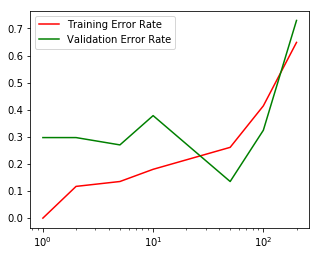

In [351]:
Y = iris[:,-1] # target value is the last column
X = iris[:,0:2] # features are the first 2 columns

np.random.seed(0)
X,Y = ml.shuffleData(X,Y);  # shuffle data randomly
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); 


K = [1,2,5,10,50,100,200];
errTrain = [];
errVa = [];


fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    k = K[i]
    print 'k =', k
    learner.train(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrain.append(np.mean(Yhat != Ytr))
    YvaHat = learner.predict(Xva)
    errVa.append(np.mean(YvaHat != Yva))
    print "Training Error Rate:", errTrain[i]
    print "Validation Error Rate:", errVa[i]
    print
    
ax.semilogx(K, errTrain, "r", label = "Training Error Rate")
ax.semilogx(K, errVa, "g", label = "Validation Error Rate" )
ax.legend()
plt.show()

Based on these results, the value of k I recommend is 50 because it has the least error rate on the validation data.

## Question 3

k = 1
Training Error Rate: 0.0
Validation Error Rate: 0.0540540540541

k = 2
Training Error Rate: 0.027027027027
Validation Error Rate: 0.027027027027

k = 5
Training Error Rate: 0.018018018018
Validation Error Rate: 0.027027027027

k = 10
Training Error Rate: 0.018018018018
Validation Error Rate: 0.027027027027

k = 50
Training Error Rate: 0.117117117117
Validation Error Rate: 0.0540540540541

k = 100
Training Error Rate: 0.378378378378
Validation Error Rate: 0.378378378378

k = 200
Training Error Rate: 0.648648648649
Validation Error Rate: 0.72972972973



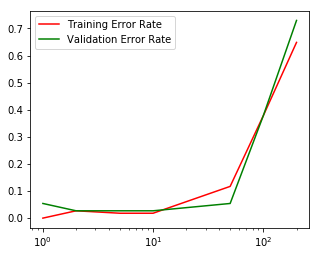

In [352]:
## With all the features:

Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the first 4 columns

np.random.seed(0)
X,Y = ml.shuffleData(X,Y);  # shuffle data randomly
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); 


K = [1,2,5,10,50,100,200];
errTrain = [];
errVa = [];

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    k = K[i]
    print 'k =', k
    learner.train(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrain.append(np.mean(Yhat != Ytr))
    YvaHat = learner.predict(Xva)
    errVa.append(np.mean(YvaHat != Yva))
    print "Training Error Rate:", errTrain[i]
    print "Validation Error Rate:", errVa[i]
    print

ax.semilogx(K, errTrain, "r", label = "Training Error Rate")
ax.semilogx(K, errVa, "g", label = "Validation Error Rate" )
ax.legend()
plt.show()

Now with all the features in the data set, the semi-log plot is very different from the previous one, and this time the k value of 5 and 10 brings the least error rate on both training data and validation data.

# Problem 3: Naive Bayes Classifiers

## Question 1

The class probability: 
$$
P(y = 1) = \frac{4}{10} = \frac{2}{5};
P(y = -1) = \frac{6}{10} = \frac{3}{5}
$$ 

The individual feature probabilities for each class y and feature $X_i$:

$$
P(X_1=0|y=1)= \frac{1}{4}; P(X_1=1|y=1)= \frac{3}{4}
$$ 
$$
P(X_1=0|y=-1)= \frac{1}{2}; P(X_1=1|y=-1)= \frac{1}{2}
$$

$$
P(X_2=0|y=1)= 1; P(X_2=1|y=1)= 0
$$ 
$$
P(X_2=0|y=-1)= \frac{1}{6}; P(X_2=1|y=-1)= \frac{5}{6}
$$

$$
P(X_3=0|y=1)= \frac{1}{4}; P(X_3=1|y=1)= \frac{3}{4}
$$ 
$$
P(X_3=0|y=-1)= \frac{1}{3}; P(X_3=1|y=-1)= \frac{2}{3}
$$

$$
P(X_4=0|y=1)= \frac{1}{2}; P(X_4=1|y=1)= \frac{1}{2}
$$ 
$$
P(X_4=0|y=-1)= \frac{1}{6}; P(X_4=1|y=-1)= \frac{5}{6}
$$

$$
P(X_5=0|y=1)= \frac{3}{4}; P(X_5=1|y=1)= \frac{1}{4}
$$ 
$$
P(X_5=0|y=-1)= \frac{2}{3}; P(X_5=1|y=-1)= \frac{1}{3}
$$

## Question 2

For $X = [0,0,0,0,0]$, the predicted class is y = +1;
For $X = [1,1,0,1,0]$, the predicted class is y = -1.

## Question 3

$$
P(y=1|X=[1,1,0,1,0]) = \frac{P(X=[1,1,0,1,0]|y=1)P(y=1)}{P(X=[1,1,0,1,0]|y=1)P(y=1)+
P(X=[1,1,0,1,0]|y=-1)P(y=-1)}
$$
Since $P(X_2=1|y=1)= 0$, therefore the posterior probability is 0.

## Question 4

Becasuse our data samples are less the number of parameters $2^5$. For some feature combinations that we don't observe in the training data, the "joint" Bayes classifier would predict 0 probability in the validation data, which could result in misclassification in this case since for ties we prefer to predict class +1. And using more complex models would cause overfitting.

## Question 5

The naive Bayes model over features $x_2, x_3, x_4, x_5$ is:

$$
P(y=1|X=[x_2,x_3,x_4,x_5]) = 
$$

$$
\frac{P(X=[x_2,x_3,x_4,x_5]|y=1)P(y=1)}{P(X=[x_2,x_3,x_4,x_5]|y=1)P(y=1)+
P(X=[x_2,x_3,x_4,x_5]|y=-1)P(y=-1)},
$$

where 
$$
P(X=[x_2,x_3,x_4,x_5]|y=1) = P(x_2|y=1)P(x_3|y=1)P(x_4|y=1)P(x_5|y=1)
$$

# Statement of Collaboration

I have abided by the rules of conduct and academic honesty adoped by UC Irvine. I did not discuss the specific solutions to this homework with any person.

Chenxi Wang
10/8/2017